In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress
import ast


### player_games

In [2]:
player_games=pd.read_csv('data/player_games.csv')

In [3]:
player_games

,Unnamed: 0,player_id,nickname,firstname,lastname,birth_date,player_name,team_id,jersey_number,minutes_played,is_starter,game_id
0,0,6165,F. Andone,Florin,Andone,1993-04-11,Florin Andone,11944,0,63,True,1694390
1,1,83753,N. Stanciu,Nicolae Claudiu,Stanciu,1993-05-07,Nicolae Claudiu Stanciu,11944,0,74,True,1694390
2,2,84017,A. Popa,Adrian,Popa,1988-08-16,Adrian Popa,11944,0,84,True,1694390
3,3,83574,C. Tătărușanu,Anton Ciprian,Tătărușanu,1986-02-09,Anton Ciprian Tătărușanu,11944,0,96,True,1694390
4,4,33235,B. Stancu,Bogdan Sorin,Stancu,1987-06-28,Bogdan Sorin Stancu,11944,0,96,True,1694390
...,...,...,...,...,...,...,...,...,...,...,...,...
53710,53710,20749,A. Bertolacci,Andrea,Bertolacci,1991-01-11,Andrea Bertolacci,3193,0,96,True,2576338
53711,53711,21468,M. Perin,Mattia,Perin,1992-11-10,Mattia Perin,3193,0,96,True,2576338
53712,53712,349102,S. Omeonga,Stephane,Omeonga,1996-03-27,Stephane Omeonga,3193,0,58,False,2576338
53713,53713,21177,G. Pandev,Goran,Pandev,1983-07-27,Goran Pandev,3193,0,47,False,2576338


There is no description for this table, but it seems self explanatory. But I will poke around to see how it works. It seems to have a summary on every player for every game to say if they were a starter and how many minutes they played.

In [14]:
player_games[player_games['lastname'].str.contains('Salah')].head()

,Unnamed: 0,player_id,nickname,firstname,lastname,birth_date,player_name,team_id,jersey_number,minutes_played,is_starter,game_id
1494,1494,120353,Mohamed Salah,Mohamed,Salah Ghaly,1992-06-15,Mohamed Salah Ghaly,16129,0,94,True,2057956
1577,1577,120353,Mohamed Salah,Mohamed,Salah Ghaly,1992-06-15,Mohamed Salah Ghaly,16129,0,102,True,2057959
3440,3440,120353,Mohamed Salah,Mohamed,Salah Ghaly,1992-06-15,Mohamed Salah Ghaly,1612,0,90,True,2499727
3614,3614,120353,Mohamed Salah,Mohamed,Salah Ghaly,1992-06-15,Mohamed Salah Ghaly,1612,0,33,False,2499733
3890,3890,120353,Mohamed Salah,Mohamed,Salah Ghaly,1992-06-15,Mohamed Salah Ghaly,1612,0,95,True,2499743


I did a check on his stats online, and i can see he only played 36 games in the premiership that year. I can see that he has 36 games associated with the team_id 1612, and 2 games associated with 16129. I now expect those codes to be for liverpool and Egypt respectively

In [15]:
teams=pd.read_csv('data/teams.csv')
teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [19]:
teams[teams['wyId'].isin([1612,16129])]

,city,name,wyId,officialName,area,type
77,Liverpool,Liverpool,1612,Liverpool FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
123,Cairo,Egypt,16129,Egypt,"{'name': 'Egypt', 'id': 818, 'alpha3code': 'EG...",national


nice, that spot-check checks out

In [20]:
player_games[player_games['lastname'].str.contains('Coleman')].head()

,Unnamed: 0,player_id,nickname,firstname,lastname,birth_date,player_name,team_id,jersey_number,minutes_played,is_starter,game_id
689,689,8240,S. Coleman,Séamus,Coleman,1988-10-11,Séamus Coleman,8274,0,94,True,1694414
759,759,8240,S. Coleman,Séamus,Coleman,1988-10-11,Séamus Coleman,8274,0,93,True,1694417
787,787,8240,S. Coleman,Séamus,Coleman,1988-10-11,Séamus Coleman,8274,0,95,True,1694418
1092,1092,8240,S. Coleman,Séamus,Coleman,1988-10-11,Séamus Coleman,8274,0,97,True,1694429
9922,9922,8240,S. Coleman,Séamus,Coleman,1988-10-11,Séamus Coleman,1623,0,96,True,2499963


In [21]:
teams[teams['wyId'].isin([1623,8274])]

,city,name,wyId,officialName,area,type
65,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
130,Dublin,Republic of Ireland,8274,Republic of Ireland,"{'name': 'Ireland Republic', 'id': 372, 'alpha...",national


This checks out too

### playerank


In [22]:
playerank= pd.read_csv('data/playerank.csv')

In [23]:
playerank

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90
...,...,...,...,...,...,...
46892,0,0.0179,2576295,99902,left FW,23
46893,0,0.0020,2576305,99902,central MF,32
46894,0,-0.0029,2576318,99902,left FW,70
46895,0,0.0253,2576325,99902,central MF,90


The PlayeRank score of the players in the matches they played indicates, on a scale from 0 to 1, how well the player performed in that match (0 = unforgettably bad, 1 = amazing). The score has been computed using the PlayeRank framework. If you use this data, please cite the following paper: [PlayeRank Framework](https://arxiv.org/abs/1802.04987).

Each document in the JSON file contains the following fields:
- **goalScored**: The number of goals scored by the player in the match.
- **playerankScore**: The PlayeRank score of the player in the match.
- **matchId**: The identifier of the match.
- **playerId**: The identifier of the player.
- **roleCluster**: The role of the player in the match, as computed by the PlayeRank framework.
- **minutesPlayed**: The minutes played by the player in the match.


In [26]:
playerank.describe()

,goalScored,playerankScore,matchId,playerId,minutesPlayed
count,46897.000000,46897.000000,4.689700e+04,46897.000000,46897.000000
mean,0.106830,0.006796,2.495393e+06,97381.661791,74.162740
std,0.349391,0.018042,1.588741e+05,122322.483444,25.606931
min,0.000000,-0.119200,1.694390e+06,12.000000,-3.000000
25%,0.000000,-0.002700,2.500094e+06,12536.000000,66.000000
50%,0.000000,0.003500,2.516840e+06,25846.000000,90.000000
75%,0.000000,0.013300,2.565828e+06,173212.000000,90.000000
max,4.000000,0.173100,2.576338e+06,566942.000000,120.000000


the playerrank is not as described in the description provided. It looks to be a scale between -0.119200 and 0.173100. It is not symmetrical around the number 0. maybe thats because its more likely that a player would score a 10 than a 0. That is how most play rating scales work. I will assume that 0.173100 is a perfect score, and -0.173100 is a 0. I will rescale this column so it is more reader friendly. 

I just noticed that the table playerank and the column playerankScore only has one "r". Maybe ill change that

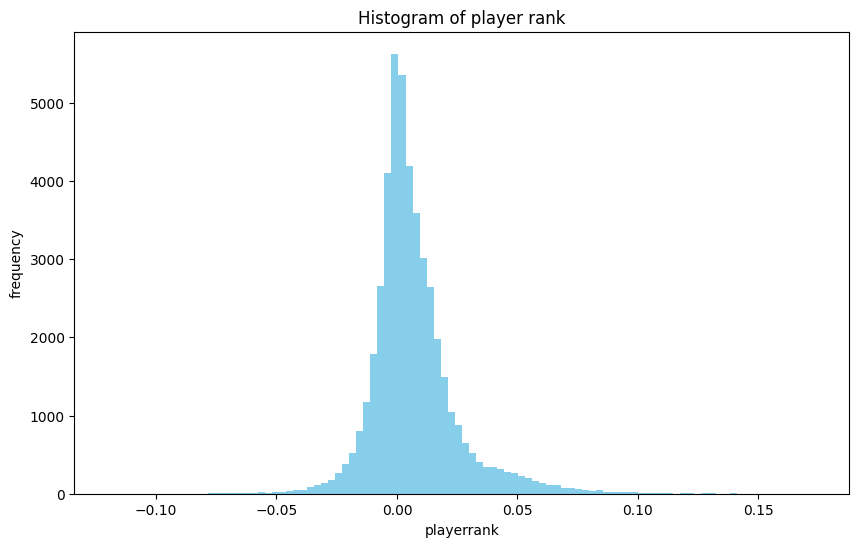

In [30]:
plt.figure(figsize=(10,6))
plt.hist(playerank['playerankScore'], bins=100, color='skyblue')
plt.xlabel('playerrank')
plt.ylabel('frequency')
plt.title('Histogram of player rank')
plt.show()

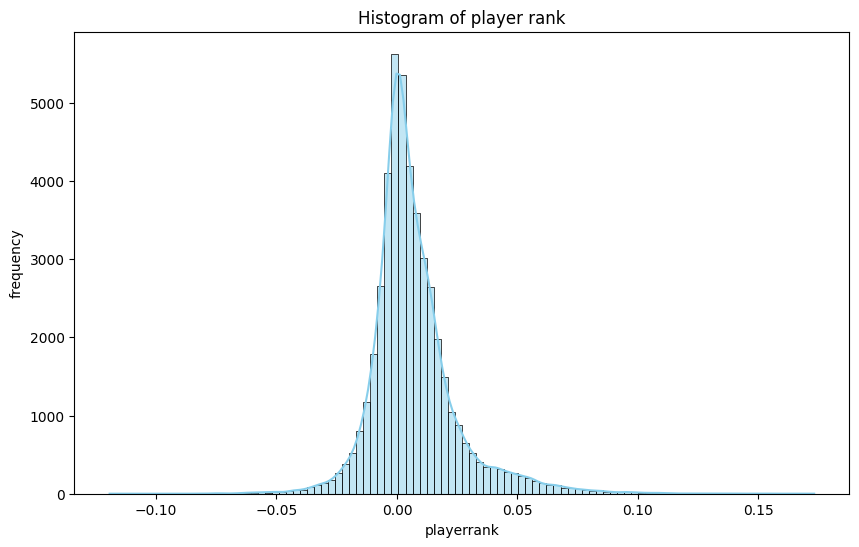

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(playerank['playerankScore'], kde=True, bins=100, color='skyblue')
plt.xlabel('playerrank')
plt.ylabel('frequency')
plt.title('Histogram of player rank')
plt.show()

In [32]:
playerank[['playerankScore']].describe()

,playerankScore
count,46897.000000
mean,0.006796
std,0.018042
min,-0.119200
25%,-0.002700
50%,0.003500
75%,0.013300
max,0.173100


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler(feature_range=(3, 10))

In [43]:
playerank['scaled_playerankScore'] = scaler.fit_transform(playerank[['playerankScore']])

In [44]:
playerank

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed,scaled_playerankScore
0,0,0.0053,2057991,10014,right CB,90,5.981526
1,0,0.0009,2057992,10014,right CB,41,5.876155
2,0,-0.0013,2057998,100140,central MF,90,5.823469
3,0,0.0031,2058000,100140,left CB,90,5.928840
4,0,0.0035,2499869,10108,right CB,90,5.938419
...,...,...,...,...,...,...,...
46892,0,0.0179,2576295,99902,left FW,23,6.283271
46893,0,0.0020,2576305,99902,central MF,32,5.902497
46894,0,-0.0029,2576318,99902,left FW,70,5.785152
46895,0,0.0253,2576325,99902,central MF,90,6.460486


In [45]:
playerank[['scaled_playerankScore']].describe()

,scaled_playerankScore
count,46897.000000
mean,6.017348
std,0.432061
min,3.000000
25%,5.789942
50%,5.938419
75%,6.173110
max,10.000000


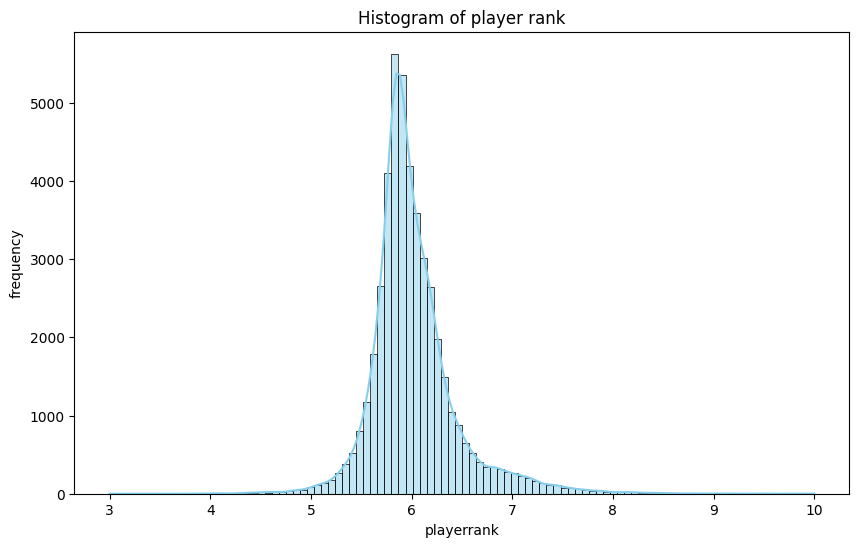

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(playerank['scaled_playerankScore'], kde=True, bins=100, color='skyblue')
plt.xlabel('playerrank')
plt.ylabel('frequency')
plt.title('Histogram of player rank')
plt.show()

In [67]:
playerank[playerank['scaled_playerankScore']>9].head()

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed,scaled_playerankScore
349,0,0.1376,2576275,105334,left FW,46,9.149846
372,0,0.1520,2499970,105338,central MF,90,9.494697
782,0,0.1524,2500078,11066,central MF-central FW-right FW,90,9.504276
1517,0,0.1496,2576135,122,central FW,90,9.437222
3616,1,0.1314,2499942,14703,central FW,83,9.001368


I find this scale much easier to work with. Out of curiousity I will see what some of these highest rated performances where

In [68]:
matches = pd.read_csv('data/matches_England.csv')


In [51]:
temp=playerank[playerank['scaled_playerankScore']>9].merge(matches[['wyId','label']], how='left', left_on='matchId', right_on='wyId')

In [69]:
players = pd.read_csv('data/players.csv')


In [56]:
temp=temp.merge(players[['wyId','firstName','lastName']], how='left', left_on='playerId', right_on='wyId')

In [127]:
temp[~temp['label'].isna()]  # filter for the English Premier League games

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed,scaled_playerankScore,wyId_x,label,wyId_y,firstName,lastName
1,0,0.1520,2499970,105338,central MF,90,9.494697,2499970.0,"Arsenal - Everton, 5 - 1",105338,Henrikh,Mkhitaryan
2,0,0.1524,2500078,11066,central MF-central FW-right FW,90,9.504276,2500078.0,"West Ham United - Manchester City, 1 - 4",11066,Raheem Shaquille,Sterling
4,1,0.1314,2499942,14703,central FW,83,9.001368,2499942.0,"Huddersfield Town - West Ham United, 1 - 4",14703,Marko,Arnautovi\u0107
9,0,0.1585,2500024,245364,left FW,90,9.650359,2500024.0,"Manchester City - Brighton & Hove Albion, 3 - 1",245364,Leroy,San\u00e9
12,0,0.1386,2499982,38021,central FW,90,9.173794,2499982.0,"Manchester City - Leicester City, 5 - 1",38021,Kevin,De Bruyne
16,0,0.1398,2499725,54,central FW,90,9.202532,2499725.0,"Newcastle United - Tottenham Hotspur, 0 - 2",54,Christian,Dannemann Eriksen


I can see that these are the 6 top performances across the whole league for that season. I actually would have expected the top performances to include a lot of goals. I checked the first peformance (by Henrikh Mkhitaryan) and he had 3 assists in that game. So that is definitely a rare, good performance. So I am actually glad to see that the top performances arent so heavily weighted by goals scored. It makes me think this rating system is actually quite mature. The system isnt being swayed by the eye catching goal moments, it must really dig into the stats more. I like this rating system.

I have just used this Scaling between 3 and 10 for my own benefit while playing with the data. The paper the the original scaling is based on is very very thourough and I will keep it like that when it comes to the analysis. 

https://arxiv.org/pdf/1802.04987

In [135]:
playerank

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed,scaled_playerankScore
0,0,0.0053,2057991,10014,right CB,90,5.981526
1,0,0.0009,2057992,10014,right CB,41,5.876155
2,0,-0.0013,2057998,100140,central MF,90,5.823469
3,0,0.0031,2058000,100140,left CB,90,5.928840
4,0,0.0035,2499869,10108,right CB,90,5.938419
...,...,...,...,...,...,...,...
46892,0,0.0179,2576295,99902,left FW,23,6.283271
46893,0,0.0020,2576305,99902,central MF,32,5.902497
46894,0,-0.0029,2576318,99902,left FW,70,5.785152
46895,0,0.0253,2576325,99902,central MF,90,6.460486


In [176]:
player_stats = playerank.groupby(['playerId']).agg(
    average_rating=('playerankScore', 'mean'),
    average_scaled_rating=('scaled_playerankScore', 'mean'),# Calculate mean of playerankScore
    tot_minutes_played=('minutesPlayed', 'sum'),
    tot_goalScored=('goalScored', 'sum') # Calculate sum of minutesPlayed
).reset_index()

In [177]:
player_stats

,playerId,average_rating,average_scaled_rating,tot_minutes_played,tot_goalScored
0,12,0.010700,6.110845,180,0
1,36,0.008550,6.059357,2160,1
2,38,0.001000,5.878549,347,0
3,45,0.001180,5.882860,288,0
4,48,0.011824,6.137760,4104,1
...,...,...,...,...,...
2714,531655,-0.004800,5.739651,25,0
2715,551398,0.005200,5.979131,63,0
2716,552555,0.002500,5.914471,74,0
2717,564512,0.003300,5.933630,37,0


In [178]:
player_stats.sort_values(by="average_rating", ascending=False)

,playerId,average_rating,average_scaled_rating,tot_minutes_played,tot_goalScored
2668,448215,0.053900,7.145399,27,0
2608,404285,0.048200,7.008895,61,0
109,3359,0.043685,6.900770,3356,35
1337,40810,0.043488,6.896052,2250,22
644,14909,0.039067,6.790170,208,1
...,...,...,...,...,...
150,3509,-0.019300,5.392405,65,0
1365,49979,-0.019480,5.388094,842,0
370,7961,-0.020267,5.369255,459,0
2492,361536,-0.024900,5.258296,108,0


In [179]:
#filtering where a player played the equivalent of 10 full games
subset_player_stats=player_stats[player_stats['tot_minutes_played']>900]

In [180]:
subset_player_stats.sort_values(by="average_rating", ascending=False)

,playerId,average_rating,average_scaled_rating,tot_minutes_played,tot_goalScored
109,3359,0.043685,6.900770,3356,35
1337,40810,0.043488,6.896052,2250,22
84,3322,0.035981,6.716276,3257,33
436,8325,0.034863,6.689500,2122,23
959,21385,0.033690,6.661403,3125,8
...,...,...,...,...,...
237,4014,-0.016167,5.467442,929,0
1615,92899,-0.016404,5.461769,2387,0
1621,93000,-0.017281,5.440765,2790,0
316,6513,-0.017375,5.438505,1368,0


In [181]:
subset_player_stats.sort_values(by="average_rating", ascending=False).merge(players[['wyId','firstName','lastName']], how='left', left_on='playerId', right_on='wyId').head(10)

,playerId,average_rating,average_scaled_rating,tot_minutes_played,tot_goalScored,wyId,firstName,lastName
0,3359,0.043685,6.900770,3356,35,3359,Lionel Andr\u00e9s,Messi Cuccittini
1,40810,0.043488,6.896052,2250,22,40810,Neymar,da Silva Santos Junior
2,3322,0.035981,6.716276,3257,33,3322,Cristiano Ronaldo,dos Santos Aveiro
3,8325,0.034863,6.689500,2122,23,8325,Sergio Leonel,Ag\u00fcero del Castillo
4,21385,0.033690,6.661403,3125,8,21385,Lorenzo,Insigne
5,25707,0.030227,6.578470,3391,16,25707,Eden,Hazard
6,3802,0.029532,6.561844,2854,17,3802,Philippe,Coutinho Correia
7,353833,0.029253,6.555151,2698,17,353833,Kylian,Mbapp\u00e9 Lottin
8,120353,0.029108,6.551677,3102,34,120353,Mohamed,Salah Ghaly
9,21384,0.028246,6.531030,2830,29,21384,Ciro,Immobile


These are the top players across the world that year. It looks like a pretty solid top 10! it gives me confidence that this rating is a good system.


I can see the top 3 players of the premier league are in the overall top 10 (Aguero, Hazard and Salah). Aguero didnt play as many games as the other 2. Salah won the player of the year award in the premier league that year.  Admittingly these numbers take into account all matches (including ones not in the premier league). But it seems that he was voted the best player because people give a higher rating to goals than they do overall match play. Salah scored a lot more goals than Hazard.